First of all, I'm going to import and investigate the data a little and dive into the numbers and trends. By doing so, I'm selecting the relevant website for the Use Case.

In [1]:
#import Data
import pandas as pd
daily_visits_websites1 = pd.read_csv('/Users/dgrimm1/Documents/analytics-traffic-forecast/data/ivw_spring_visits_latest.csv', delimiter=',', index_col='Tag', parse_dates=True)
daily_visits_websites1.head()
#daily_visits_websites1_missing = pd.read_csv('/Users/dgrimm1/Documents/analytics-traffic-forecast/data/ivw_spring_visits_latest_missing_value.csv', delimiter=',', index_col='Tag', parse_dates=True)


,Autobild_App_Android,Autobild_App_iOS,Autobild_Mobil,Autobild_Stationär,BILD_Android_Smartphone,BILD_Android_Tablet,BILD_TV_App,BILD_Windows_Phone_App,BILD_iPad_App,BILD_iPhone_App,...,n24_news_Android_App,n24_news_Windows_7_Phone_App,n24_news_Windows_8_Phone_App,n24_news_iPad_App,n24_news_iPhone_App,n24_nexT_Android_App,n24_nexT_iPad_App,n24_nexT_iPhone_App,n24de,n24de_MOBIL
Tag,,,,,,,,,,,,,,,,,,,,,
2017-11-20,2401.0,5337.0,148127.0,NaN,442525.0,NaN,888.0,3889.0,130413.0,534703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-23,NaN,NaN,NaN,NaN,444371.0,NaN,1349.0,7258.0,146237.0,598871.0,...,331546.0,NaN,NaN,45771.0,266380.0,NaN,NaN,NaN,776595.0,943942.0
2015-04-21,NaN,NaN,NaN,NaN,204381.0,NaN,3792.0,4009.0,65272.0,373971.0,...,102356.0,509.0,263.0,9729.0,64900.0,1035.0,2755.0,1540.0,301109.0,159349.0
2018-06-13,2398.0,5634.0,138485.0,532648.0,442496.0,NaN,621.0,2619.0,118571.0,572438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-24,NaN,NaN,NaN,NaN,285383.0,NaN,1013.0,8672.0,109915.0,411290.0,...,143238.0,NaN,NaN,14722.0,92875.0,722.0,1880.0,838.0,285684.0,212312.0


In [2]:
#Looking for the BILDde Website Visits within the dataset
daily_visits_websites1.columns

Index(['Autobild_App_Android', 'Autobild_App_iOS', 'Autobild_Mobil',
       'Autobild_Stationär', 'BILD_Android_Smartphone', 'BILD_Android_Tablet',
       'BILD_TV_App', 'BILD_Windows_Phone_App', 'BILD_iPad_App',
       'BILD_iPhone_App', 'BILDde', 'BILDde_Mobil', 'BZ-Berlin_Mobil',
       'BZ-berlinde', 'Bundesliga_Android', 'Bundesliga_iOS',
       'Clever_Tanken_App_Android', 'Clever_Tanken_App_Windows',
       'Clever_Tanken_App_iOS', 'Computerbild_App_Android',
       'Computerbild_App_iOS', 'Computerbild_Mobil', 'Computerbild_Stationär',
       'Fitbook_Desktop', 'Fitbook_Mobile', 'NOIZZ_Mobil', 'NOIZZde',
       'Sport_BILD_App_Android', 'Sport_BILD_App_iOS', 'Stylebook',
       'Stylebook_Mobil', 'Techbook_Mobil', 'Techbook_Stationär', 'Travelbook',
       'Travelbook_Mobil', 'WELT_Android_HD', 'WELT_Android_Phone_App',
       'WELT_Edition_Android', 'WELT_Edition_iOS', 'WELT_iPad_App',
       'WELT_iPhone_App', 'WELTde', 'WELTde_MOBIL', 'myHOMEBOOK_mobil',
       'myHOMEBOOKde

In [3]:
#df1 = df[['a', 'b']]
daily_visits_bildde = daily_visits_websites1[['BILDde']]
weekly_visits_bildde = daily_visits_websites1[['BILDde']]

#daily_visits_websites1['BILDde']

Rough check up for any anomaly

In [4]:
daily_visits_bildde.describe()

,BILDde
count,2.310000e+03
mean,5.104914e+06
std,1.155445e+06
min,2.317733e+06
25%,4.354854e+06
50%,5.080229e+06
75%,5.930848e+06
max,9.769217e+06


At first sight, there are no major anomalies that needs further investigation. Next step is to check for any missing data in the time series. To do so, I check if any date appears that has no value.

In [5]:
#daily_visits_bildde.head()
pd.date_range(start = '2014-03-31', end = '2019-12-31').difference(daily_visits_bildde.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

There are no missing data points in the times series provided. I continue by sorting the time series from lowest to highest to check for values that are not within one or two std.deviations and plotting the distribution of the values in a histogramm.

In [6]:
daily_visits_bildde_sorted_visits = daily_visits_bildde.sort_values(by='BILDde', ascending=True)
daily_visits_bildde_sorted_visits.head(10)

,BILDde
Tag,
2019-12-24,2317733.0
2019-12-25,2469590.0
2019-04-20,2483806.0
2018-12-24,2512622.0
2019-09-21,2537833.0
2019-09-14,2602518.0
2019-06-29,2623799.0
2019-06-22,2623878.0
2019-08-24,2644608.0


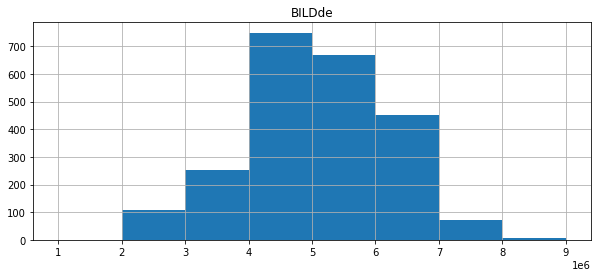

In [7]:
#Plotting a historgram of the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.show()
bins_list =[1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000]
daily_visits_bildde.hist(bins=bins_list)
plt.show()

By looking at the lowest values and corresponding dates in the dataframe, one can spot that at least in 2018 and 2019 around Christmas Eve, which is on 24th December in Germany, were one of the lowest traffic days. This means that people on stationary computers, only desktop traffic is shown here, seem to be less interested in News and gossip around that time of the year.

Furthermore, one can see that even the lowest values seem to fit the data and are still in range with more than 100 values ranging from 2-3 Million Visits per Day, which still accounts for almost 5% of the data point in the dataset and only a few are outliers on the top end, with Visits > 8-9 Million Visits per day.

Now, I will sort and plot the actual time series.

In [8]:
daily_visits_bildde_sorted = daily_visits_bildde.sort_values(by='Tag', ascending=True)
daily_visits_bildde_sorted

,BILDde
Tag,
2014-02-11,NaN
2014-02-12,7064982.0
2014-02-13,6852405.0
2014-02-14,6382729.0
2014-02-15,5073942.0
...,...
2020-06-05,4226369.0
2020-06-06,3111097.0
2020-06-07,3291791.0


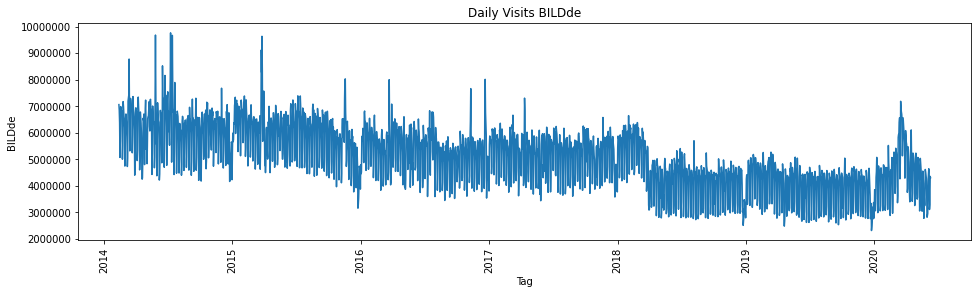

In [9]:
#Plotting a line chart of the data

plt.figure(figsize=(16, 4))
sns.lineplot(x="Tag", y="BILDde", data=daily_visits_bildde)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=90)
plt.title('Daily Visits BILDde')
plt.show()

This graph clearly shows that there is some decreasing tendency over time with some outliers due to breaking news, now and than. 

But there is also a huge drop in values from the first quarter of 2018 onwards, which is clearly visible in the data. The reason behind this drop is that some technical changes on the website where made in order to have a better user experience for users who visit the site using a smartphone to visit the mobile version of the website instead of the desktop version. So, there was a shift from desktop to mobile that explains the drop in desktop visits. 

Due to the Corona Pandemic, traffic on news sites in general as well as on BILD.de increased massively from March till May in Germany, which explains the increasing and later decreasing trend after the first wave of news related to the Corona Pandemic. This means in turn that desktop visits profited from the news too.

In [10]:
#Since we do not have a full month available for February 2014, we start of with data from 31st March
daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31']

Tag
2014-03-31    6752888.0
2014-04-01    6944375.0
2014-04-02    6929585.0
2014-04-03    6718480.0
2014-04-04    6419949.0
                ...    
2020-05-27    4404189.0
2020-05-28    4293698.0
2020-05-29    3786990.0
2020-05-30    2819128.0
2020-05-31    2878169.0
Name: BILDde, Length: 2254, dtype: float64

In the next step, I will check if the times series is stationary. This is important because Machine Learning algorithms tend to work better if a series is stationary. A series is stationary if the statistical properties of a process don't change over time. What this means is that if a Times Series has a trend or seasonality, it depends on the past observed value at a given time and therefore is not stationary. If there is no time dependency over past values at a given time, a Series can be called stationary. 

To check for stationarity, a unit root test can be used. I decided to use the Augmented Dickey Fuller (ADF) test. Here the ADF's null hypothesis is that the time series is non-stationary. So, if the p-value of the test is less than the significance level, we reject the null hypothesis and consider the time series to be stationary.




In [11]:
#Check for Stationary using Adfuller  Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31'])
#df.value.dropna()
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.033586
p-value: 0.272044


Since the P-value's significance level is greater than 0.01 or 0.05, we need to take into consideration not only to choose an AR or MA model or mixture but rather an ARIMA model, where differencing is used in order to make the time series stationary.

Another way at looking for stationary or other statistical properties is to plot an ACF or PCF.

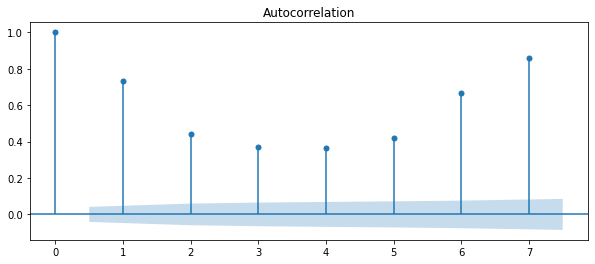

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
plot_acf(daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31'].fillna(0).values, lags=7)
#plot_pacf(daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31'].fillna(0).values, lags=7)
rcParams['figure.figsize'] = 9, 7
plt.show()

If the ACF plot reaches quickly to zero no differencing is required, but if the autocorrelation is positive for a couple of lags, the series is not stationary and requires differencing. This is clearly the case in the plot above. That's why I will use the first order difference to see what the ACF will look like.

In [13]:
import numpy as np
df_new = daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31'].fillna(0).values
df_new = np.append(np.nan, np.diff(df_new))
df_new[1:]

array([ 191487.,  -14790., -211105., ..., -506708., -967862.,   59041.])

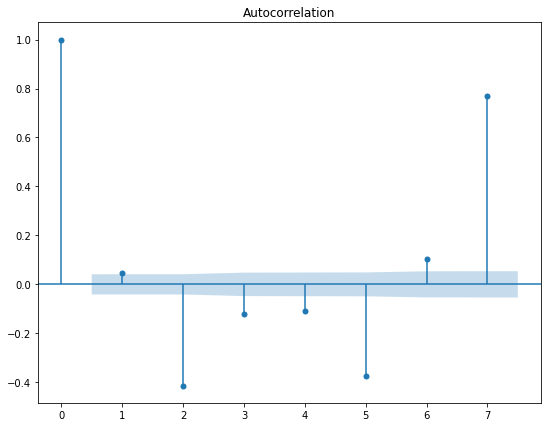

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
plot_acf(df_new[1:], lags=7)
#plot_pacf(df_new[1:], lags=7)
rcParams['figure.figsize'] = 4, 6
plt.show()

From the graph, it looks that the ACF quickly reaches zero, which can be interpreted as the series being stationary. To further investigate the Times Series, I will decompose the series into trend, seasonality and it's residuals.

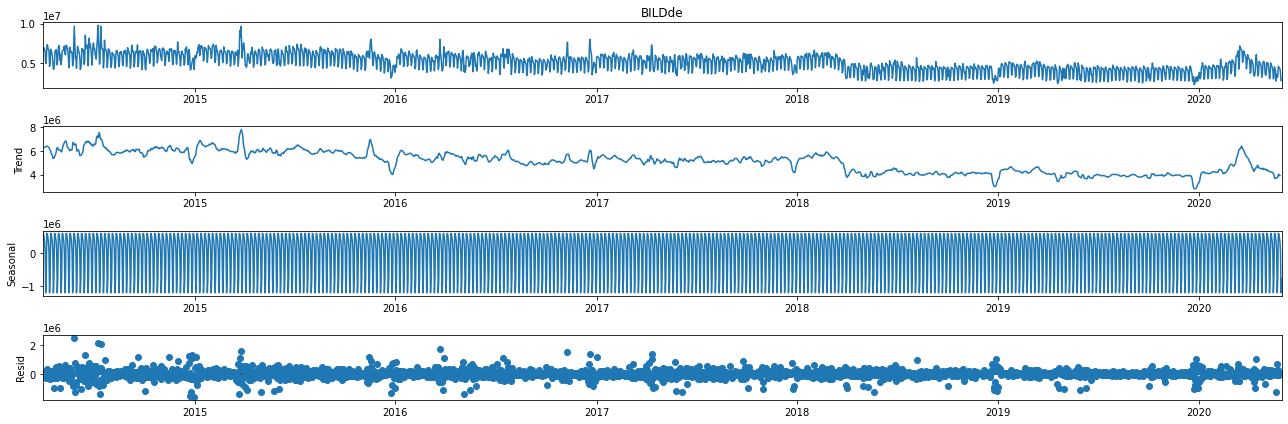

In [15]:
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
ts = daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31']
decomposition = sm.tsa.seasonal_decompose(ts, model='additive',period=7)
fig = decomposition.plot()
plt.show()


By looking at the graph, one can clearly see that there is a decreasing tendency over time of the whole series in the trend visible. 

After seperating out seasonality and trend from the times series, one receives the noise or random component that does not further contribute to the series or gives any more insides of the model. It's what's left over and remains the unknown part of the time series.


Nonetheless, there seems to be a seasonality in form of a short-term cycle in the time series. I opted for a period = 7 due to the possibility of a weekday reccurency. To underline this assumption, I will reformat the data of the time series using feature engineering. I aggregate the data from daily visits to weekday visits. Checking for Seasonality by plotting the weekdays per year using Bokeh to visualize it. This might be of high interest for evaluating which model might be most suitable for the data set.  

In [18]:
daily_visits = daily_visits_bildde.reset_index()
daily_visits.columns = ['date', 'visits']
daily_visits.date = pd.to_datetime(daily_visits.date)
daily_visits['weekday'] = daily_visits.date.dt.dayofweek
#df_data_2['month'] = df_data_2.date.dt.month
daily_visits['year'] = daily_visits.date.dt.year

In [19]:
daily_visits = daily_visits.groupby(["year", "weekday"])["visits"].sum()
daily_visits = daily_visits.to_frame()
daily_visits_weekday = daily_visits.reset_index()
daily_visits_weekday.set_index('year',inplace=True)

In [21]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import PRGn9 as palette
from bokeh.palettes import cividis
from bokeh.palettes import Spectral7
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap

palette = cividis(12)

output_notebook()

Loading BokehJS ...

In [22]:
daily_visits_weekday.weekday = daily_visits_weekday.weekday.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [23]:
source = ColumnDataSource(daily_visits_weekday)

In [24]:
import numpy as np

wds = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
years = sorted(daily_visits_weekday.reset_index().year.unique())
myValues = []
for wd in wds:
    myValues.append(daily_visits_weekday[daily_visits_weekday.weekday==wd].visits.values)
x = [(str(year), wd) for year in years for wd in wds]
visits = sum(tuple(zip(*myValues)),())

source = ColumnDataSource(data=dict(x=x, visits=visits))

bla=FactorRange(*x)

p1 = figure(x_range=FactorRange(*x), height=500, tooltips=[('Visits','@visits')])
p1.vbar(x='x',top='visits',width=.9,source=source, line_color='#333333',
        fill_color=factor_cmap('x', palette=palette, factors=wds, start=1, end=2))
p1.y_range.start = 100
p1.x_range.range_padding = 0.1
p1.xaxis.major_label_orientation = np.pi/2
p1.xgrid.grid_line_color = None

show(p1)

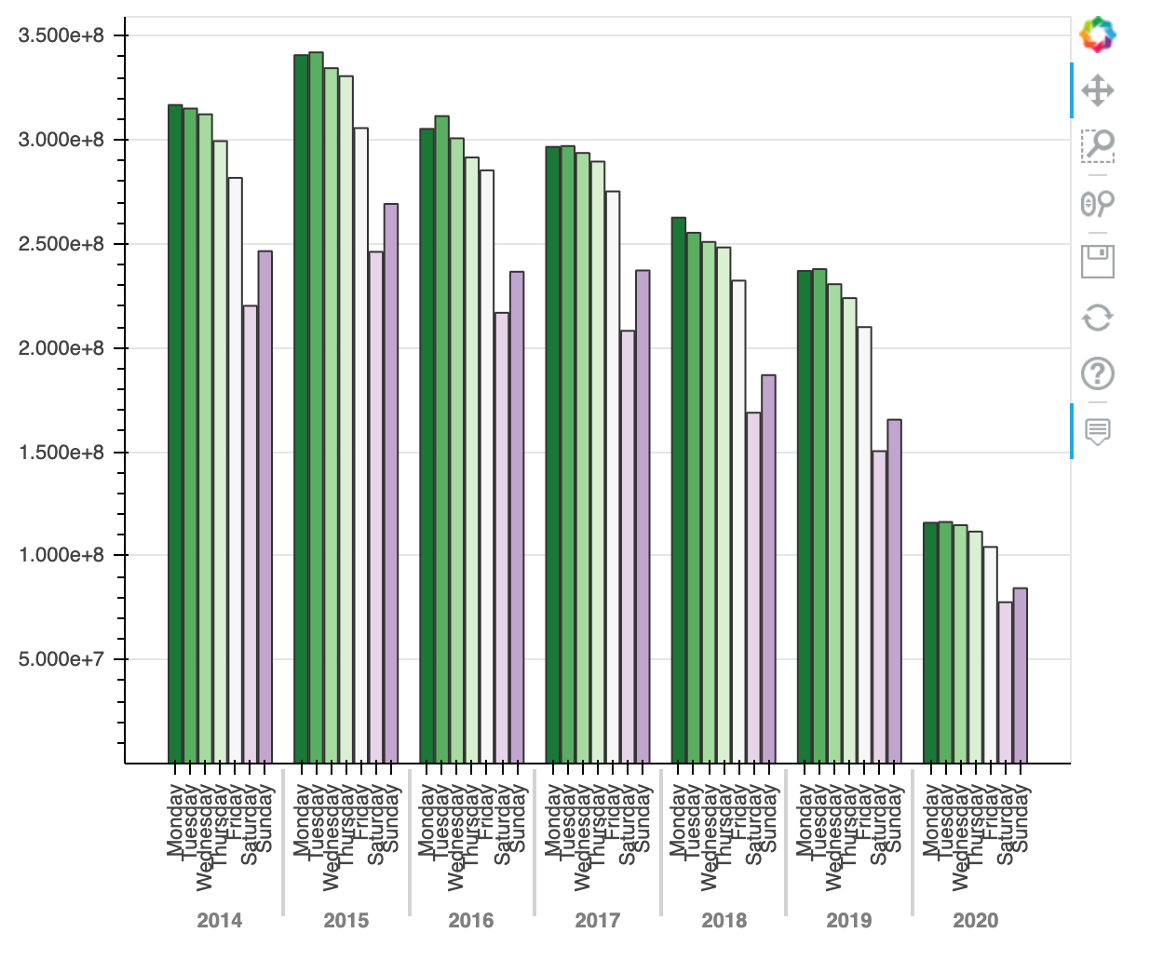

One can clearly see that Mondays and Tuesdays are usually the days with the highest traffic while Saturday is always the lowest and Sunday the second lowest. This indicates that we have a weekly/weekday seasonality. This brings us to the conclusion that a SARIMA model might be more suitable than just an ARIMA model, but in order to figure out if an SAR or SMA or a combination of both is required, will be further investigated by looking at the differenced ACF and PACF plot. The following parameter: (p,d,q) for ARIMA and (P,D,Q)S for a SARIMA model need to be found. We already discovered the d-parameter for the differencing to be equal to one. One way to determine the values for the AR term is to observe which lags are above the significans level in the PACF plot.

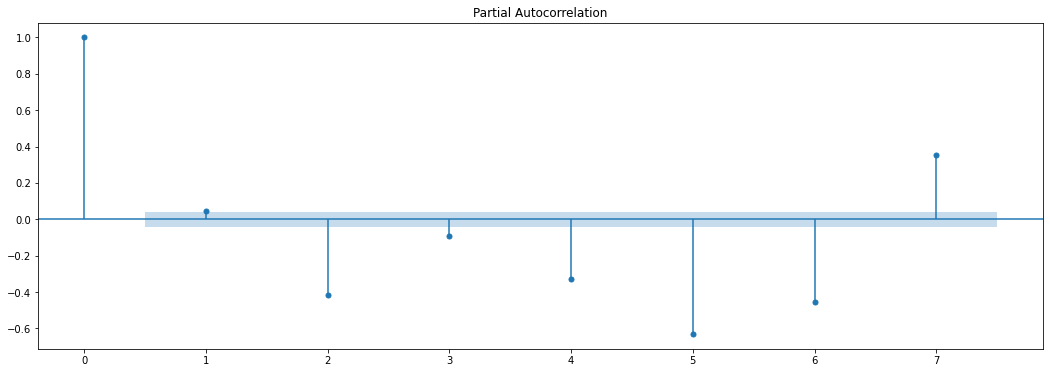

In [25]:
#Pacf for AR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
#plot_acf(daily_visits_bildde_sorted['BILDde'].loc['2014-03-31':'2020-05-31'].fillna(0).values, lags=7)
plot_pacf(df_new[1:], lags=7)
rcParams['figure.figsize'] = 5, 4
plt.show()

PACF can be seen as the correlation between a lag and the series, so one can see if the lag will be needed in the AR term or not.

The PACF lag 1 is only slightly above the significance level, which leads me to the conclusion that I should start of with p = 0 and maybe change to p = 1 or p = 2 or any higher order with another iteration, because if you want to correct the autocorrelation in a stationarized series, you need to add enough AR terms. This means that we should take as many lags as there are that cross the significance limit in the plot, which account for at least 4 if negative lags are also taken into consideration.

In order to obtain the MA term by determine the q-parameter, one needs to look at the ACF plot. The MA part is based on the error of the lagged forecast. Again the ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

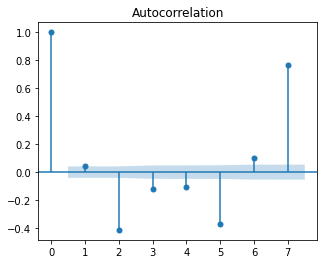

In [23]:
#ACF for MA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
plot_acf(df_new[1:], lags=7)
rcParams['figure.figsize'] = 5, 4
plt.show()

Only the first lag is slightly above the significance line. So, let’s assume that q is equal to one for a start and neglect the higher lags for a moment.

### Finding Seasonality Parameter

To determine S, we look at the big value at lag 7 in the ACF plot which suggests our season is S = 7, which corresponse with a weekly seasonality. 



### Selecting a value for d,D
Due to the differencing, the series became stationary, which is good for modelling. For that reason, d & D will be equal to one.

## All Models Parameter for SARIMA

(p,d,q)x(P,D,Q)S

(0,1,1)x(0,1,1)7

Alternatively:
(0,1,1)x(1,1,1)7